### Name Surname: Baran Gayretli
### Student Number: 23527
### Email: barangayretli@sabanciuniv.edu

In [1]:
!pip install reverse_geocoder
!pip install geopy
!pip install geocoder
!pip install researchpy

In [2]:
import pandas as pd
from IPython.display import display
import numpy as np
import csv
import datetime
from geopy.distance import geodesic,great_circle
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import researchpy as rp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import reverse_geocoder as rg

df = pd.read_csv('taxi-trips.csv')

## DATA EXPLORATION

### Data types in dataframe

In [3]:
display(df.dtypes)

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### Descriptive Statistics of Dataset

In [4]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


### Shape of the Dataset

In [5]:
df.shape

(118185, 11)

### Pickup and Dropoff Districts

In [6]:

pickup_coordinates = df[['pickup_latitude', 'pickup_longitude']].apply(tuple, axis=1).tolist()
dropoff_coordinates = df[['dropoff_latitude', 'dropoff_longitude']].apply(tuple, axis=1).tolist()

pickup_results = rg.search(pickup_coordinates, mode=2)
df['pickup_district'] = [x['name'] for x in pickup_results]

dropoff_results = rg.search(dropoff_coordinates, mode=2)
df['dropoff_district'] = [x['name'] for x in dropoff_results]
df.head()

Loading formatted geocoded file...


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


### Pickup Date time

In [7]:
tuple_temp=[]

def pickup_time(pickup_time):
    
     pickup_time=int(pickup_time[11:13])
        
     if(pickup_time<7):
        tuple_temp.append("late_night")
        return ('late_night')
     elif( pickup_time>=7 and pickup_time<9):
        tuple_temp.append("rush_hour_morning")
        return ('rush_hour_morning')
     elif( pickup_time>=9 and pickup_time<16):
        tuple_temp.append("afternoon")
        return ('afternoon')
     elif( pickup_time>=16 and pickup_time<18):
        tuple_temp.append("rush_hour_evening")
        return ('rush_hour_evening')
     elif( pickup_time>=18 and pickup_time<23):
        tuple_temp.append("evening")    
        return ('evening')
     elif( pickup_time>=23):
        tuple_temp.append("late_night")
        return('late_night')
    
    
df['time_of_day'] = df.apply(lambda x: pickup_time(x['pickup_datetime']), axis=1)
df["time_of_day"] = tuple_temp
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,afternoon


### Top 5 district where passengers prefer to leave

In [8]:
pd.value_counts(df['pickup_district'])[0:5]

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64

### Top 5 district where passengers prefer to arrive

In [9]:
pd.value_counts(df['dropoff_district'])[0:5]

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64

### Distance between cities

In [10]:
distanceBTWcities=[]
for i in range (0,len(pickup_coordinates)):
    distanceBTWcities.append(geodesic(pickup_coordinates[i], dropoff_coordinates[i]).km)

df['distance']=distanceBTWcities
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,time_of_day,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,rush_hour_evening,1.502172
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,evening,5.114807
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,rush_hour_morning,1.495018
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,afternoon,1.976279
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,afternoon,2.513961


### Show how the average distance varies as time of the day changes

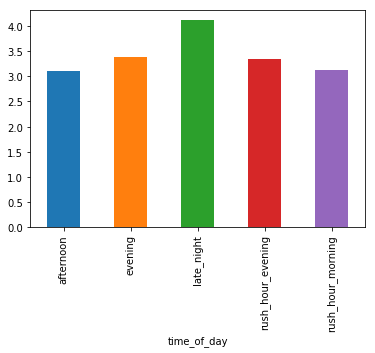

In [11]:
totalDistance=df.groupby('time_of_day')['distance'].sum()/df.groupby('time_of_day')['distance'].count()
totalDistance.plot.bar()

### Show how the trip duration varies as time of the day changes

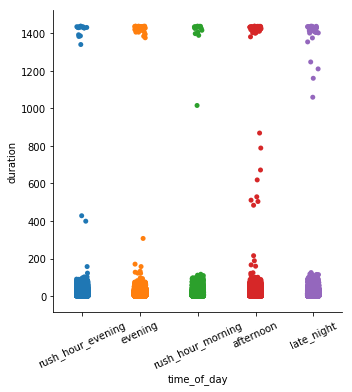

In [12]:
#visualization of how the trip duration varies as time of the day changes.
duration=[]
for i in range(0,118185):
    pickuptime = datetime.datetime.strptime(df['pickup_datetime'][i], '%Y-%m-%d %H:%M:%S')
    dropofftime = datetime.datetime.strptime(df['dropoff_datetime'][i], '%Y-%m-%d %H:%M:%S')
    duration_as_time=dropofftime-pickuptime
    duration_as_minute=duration_as_time.total_seconds()/60
    duration.append(int(duration_as_minute))

df["duration"]=duration

duration_time_of_the_day_combined=df[["duration","time_of_day"]]

g=sns.catplot(x="time_of_day",y="duration",data=duration_time_of_the_day_combined)
g.set_xticklabels(rotation=25)

## HYPOTHESIS TESTING

### 1-Does passenger group size affect the distance?
### Null hypothesis: Passenger group size has no effect on the distance
###                                   𝑥¯𝑃0=𝑥¯𝑃1=𝑥¯𝑃2=𝑥¯𝑃3=𝑥¯𝑃4=𝑥¯𝑃5=𝑥¯𝑃6
### Alternative hypothesis: Passenger group size has effect on the distance
### 𝑥¯𝑃0≠𝑥¯𝑃1≠𝑥¯𝑃2≠𝑥¯𝑃3≠𝑥¯𝑃4≠𝑥¯𝑃5≠𝑥¯𝑃6

In [13]:
#T-test applied for passenger sizes
temp=[]
for i in range(0,118185):
    if df['passenger_count'][i]==1 :
        temp.append(1)
    elif df['passenger_count'][i]>1 or df['passenger_count'][i]==0:
        temp.append(2)
        
df["passengertype"]=temp

t1=df[df["passengertype"] == 1]["distance"]

t2=df[df["passengertype"] == 2]["distance"]

stats.ttest_ind(t1, t2, equal_var=False)

Ttest_indResult(statistic=-4.901086885647343, pvalue=9.555133481557072e-07)

Conclusion: We know from the excel file that the passenger size varies as [0,6]. We must have 2 samples which one of them has just 1 passenger and the other has 0,2,3,4,5 or 6 passengers. We've grouped our data and then applied T-tes in order to obtain p value. As a result of that test, we have observed that the P value is 9.555133481557072e-07. We also know that if the p value is smaller than 0.05 (which is the significance level), we can decline our null hypothesis. Also, the test score is negative which means that trips that have just 1 passenger has a smaller mean of distance covered than those who have 0,2,3,4,5,6 passengers.

### 2-Do trip distances increase in weekends?
### Null hypothesis: The day of the week has no effect on the distance
###  𝑥¯𝑊𝑒𝑒𝑘𝐷𝑎𝑦𝑠=𝑥¯𝑊𝑒𝑒𝑘𝐸𝑛𝑑𝑠
### Alternative hypothesis: The day of the week has effect on the distance
### 𝑥¯𝑊𝑒𝑒𝑘𝐷𝑎𝑦𝑠≠𝑥¯𝑊𝑒𝑒𝑘𝐸𝑛𝑑𝑠

In [14]:
#T-test applied for Days of Week
day=[]
for i in range(0,118185):
    pickupday = datetime.datetime.strptime(df['pickup_datetime'][i], '%Y-%m-%d %H:%M:%S')
    if pickupday.strftime("%A")=="Sunday" or pickupday.strftime("%A")=="Saturday":
        day.append("weekend")
    else:
        day.append("weekday")
        
df["Day_of_week"]=day

t3=df[df["Day_of_week"] == "weekday"]["distance"]

t4=df[df["Day_of_week"] == "weekend"]["distance"]

stats.ttest_ind(t4, t3, equal_var=False)

Ttest_indResult(statistic=5.604877366928609, pvalue=2.092414433069292e-08)

Conclusion: What we need to do the test properly is that we need to group the data by 2 sample. We will group them whether it's weekday or weekend. Once we group them, we can apply T-test. From the result of the T-test, we can see that the p value is 2.092414433069292e-08 which means that it is smaller than 0.05. Therefore, we can reject our null hypothesis. Also, the test result is positive which means that the average distance covered on Weekdays are greater than the average distance covered in Weekends. 